## G2M insight for Cab Investment firm

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Cab Dataset

In [2]:
#reading the cab dataset
cab_data = pd.read_csv('cab_data.csv')
cab_data.head(2)

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     08/01/2016  Pink Cab  ATLANTA GA         30.45   
1        10000012     06/01/2016  Pink Cab  ATLANTA GA         28.62   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854

In [3]:
#Checking the number of records in cab dataset
cab_data.shape[0]

359392

In [4]:
#Checking info for the cab dataset
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [5]:
#Changing the datatype for date to datetime
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], format='%d/%m/%Y')

In [6]:
#Checking the datatypes again
cab_data.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

In [7]:
#Null values in the cab data
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [8]:
#Correcting the names of the columns 
for col in cab_data.columns:
    if ' ' in col:
        cab_data = cab_data.rename(columns={col : col.replace(' ','_')})
cab_data.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip'],
      dtype='object')

### City Dataset


In [9]:
#reading the city dataset
city = pd.read_csv('City.csv')
city.head(2)

City   Population      Users
0  NEW YORK NY   8,405,837    302,149 
1   CHICAGO IL   1,955,130    164,468

In [10]:
#Checking the number of records in city dataset
city.shape[0]

20

In [11]:
#checking the info for the city dataset
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [12]:
#Changing the population and Users datatype to integers
city['Population'] = city['Population'].str.replace(',', '').astype(int)
city['Users'] = city['Users'].str.replace(',', '').astype(int)

In [13]:
#Checking the column names
city.columns

Index(['City', 'Population', 'Users'], dtype='object')

In [14]:
city.head(2)

City  Population   Users
0  NEW YORK NY     8405837  302149
1   CHICAGO IL     1955130  164468

In [15]:
#Checking the null values
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

### Customer ID Dataset



In [16]:
#reading customer ID dataset
customer_ID = pd.read_csv('Customer_ID.csv')
customer_ID.head(2)

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237

In [17]:
#Checking the number of records in the customer id dataset
customer_ID.shape[0]

49171

In [18]:
#Info for the Customer ID dataset
customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [19]:
#Correcting the names of the columns 
for col in customer_ID.columns:
    if ' ' in col:
        customer_ID = customer_ID.rename(columns={col : col.replace(' ','_')})
customer_ID.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income_(USD/Month)'], dtype='object')

In [20]:
#Checking the null values in the Customer ID dataset
customer_ID.isnull().sum()

Customer_ID           0
Gender                0
Age                   0
Income_(USD/Month)    0
dtype: int64

In [21]:
#renaming the income column
customer_ID['Income'] = customer_ID['Income_(USD/Month)']
customer_ID.drop(['Income_(USD/Month)'],axis=1,inplace=True)
customer_ID.head(2)

Customer_ID Gender  Age  Income
0        29290   Male   28   10813
1        27703   Male   27    9237

### Transaction ID dataset

In [22]:
#reading the transaction dataset
transaction_ID = pd.read_csv('Transaction_ID.csv')
transaction_ID.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [23]:
#Checking the number of records in the Transaction ID dataset
transaction_ID.shape[0]

440098

In [24]:
#Checking the info for the Transaction ID dataset
transaction_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [25]:
#Correcting the names of the columns 
for col in transaction_ID.columns:
    if ' ' in col:
        transaction_ID = transaction_ID.rename(columns={col : col.replace(' ','_')})
transaction_ID.columns

Index(['Transaction_ID', 'Customer_ID', 'Payment_Mode'], dtype='object')

In [26]:
#Checking the count of null values in the transaction dataset
transaction_ID.isnull().sum()

Transaction_ID    0
Customer_ID       0
Payment_Mode      0
dtype: int64

### Final Merged Dataset

In [27]:
#Merging all the dataframes to get final dataframe
df= cab_data.merge(transaction_ID, on= 'Transaction_ID').merge(customer_ID, on ='Customer_ID').merge(city, on = 'City')
df.head(2)

Transaction_ID Date_of_Travel     Company        City  KM_Travelled  \
0        10000011     2016-01-08    Pink Cab  ATLANTA GA         30.45   
1        10351127     2018-07-21  Yellow Cab  ATLANTA GA         26.19   

   Price_Charged  Cost_of_Trip  Customer_ID Payment_Mode Gender  Age  Income  \
0         370.95      313.6350        29290         Card   Male   28   10813   
1         598.70      317.4228        29290         Cash   Male   28   10813   

   Population  Users  
0      814885  24701  
1      814885  24701

### Creating two new columns for month and year using the Date_of_travel columns and then dropping it.

In [28]:
#Introducing months and year columns for analysing data 
months=[]
years =[]
for i in range(len(df['Date_of_Travel'])):
    months.append(df['Date_of_Travel'][i].month)
    years.append(df['Date_of_Travel'][i].year)
df['Month'] = months
df['Year'] = years

df.drop('Date_of_Travel', axis=1, inplace=True)
df.head(2)

Transaction_ID     Company        City  KM_Travelled  Price_Charged  \
0        10000011    Pink Cab  ATLANTA GA         30.45         370.95   
1        10351127  Yellow Cab  ATLANTA GA         26.19         598.70   

   Cost_of_Trip  Customer_ID Payment_Mode Gender  Age  Income  Population  \
0      313.6350        29290         Card   Male   28   10813      814885   
1      317.4228        29290         Cash   Male   28   10813      814885   

   Users  Month  Year  
0  24701      1  2016  
1  24701      7  2018

In [29]:
#Appending Margins Column to final dataset
df['Margins'] = df['Price_Charged']-df['Cost_of_Trip']
df.head(2)

Transaction_ID     Company        City  KM_Travelled  Price_Charged  \
0        10000011    Pink Cab  ATLANTA GA         30.45         370.95   
1        10351127  Yellow Cab  ATLANTA GA         26.19         598.70   

   Cost_of_Trip  Customer_ID Payment_Mode Gender  Age  Income  Population  \
0      313.6350        29290         Card   Male   28   10813      814885   
1      317.4228        29290         Cash   Male   28   10813      814885   

   Users  Month  Year   Margins  
0  24701      1  2016   57.3150  
1  24701      7  2018  281.2772

In [30]:
# before going ahead with EDA, let's split the dataset into Pink Cab and Yellow Cab for both the companies
pink_cab = df[df['Company']=='Pink Cab']
yellow_cab = df[df['Company']=='Yellow Cab']

In [31]:
pink_cab.head(2)

Transaction_ID   Company        City  KM_Travelled  Price_Charged  \
0        10000011  Pink Cab  ATLANTA GA         30.45         370.95   
3        10000012  Pink Cab  ATLANTA GA         28.62         358.52   

   Cost_of_Trip  Customer_ID Payment_Mode Gender  Age  Income  Population  \
0       313.635        29290         Card   Male   28   10813      814885   
3       334.854        27703         Card   Male   27    9237      814885   

   Users  Month  Year  Margins  
0  24701      1  2016   57.315  
3  24701      1  2016   23.666

In [32]:
yellow_cab.head(2)

Transaction_ID     Company        City  KM_Travelled  Price_Charged  \
1        10351127  Yellow Cab  ATLANTA GA         26.19         598.70   
2        10412921  Yellow Cab  ATLANTA GA         42.55         792.05   

   Cost_of_Trip  Customer_ID Payment_Mode Gender  Age  Income  Population  \
1      317.4228        29290         Cash   Male   28   10813      814885   
2      597.4020        29290         Card   Male   28   10813      814885   

   Users  Month  Year   Margins  
1  24701      7  2018  281.2772  
2  24701     11  2018  194.6480

### Visualising the data

### Correlation Matrix

In [33]:
#Checking the correlation for the Numerical features
correlation = df[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Income','Margins','Population','Users']]
correlation.corr()

KM_Travelled  Price_Charged  Cost_of_Trip     Month      Year  \
KM_Travelled       1.000000       0.835753      0.981848 -0.001903 -0.001072   
Price_Charged      0.835753       1.000000      0.859812 -0.061116 -0.036409   
Cost_of_Trip       0.981848       0.859812      1.000000 -0.008370 -0.001773   
Month             -0.001903      -0.061116     -0.008370  1.000000 -0.030490   
Year              -0.001072      -0.036409     -0.001773 -0.030490  1.000000   
Age               -0.000369      -0.003084     -0.000189 -0.002226 -0.000579   
Income            -0.000544       0.003228     -0.000633  0.000322 -0.001617   
Margins            0.462768       0.864154      0.486056 -0.096352 -0.060567   
Population        -0.002311       0.326589      0.015108  0.064571  0.000003   
Users             -0.000428       0.281061      0.023628  0.036558 -0.000771   

                    Age    Income   Margins  Population     Users  
KM_Travelled  -0.000369 -0.000544  0.462768   -0.002311 -0.000428  
Price_Charged -0.003084  0.003228  0.864154    0.326589  0.281061  
Cost_of_Trip  -0.000189 -0.000633  0.486056    0.015108  0.023628  
Month         -0.002226  0.000322 -0.096352    0.064571  0.036558  
Year          -0.000579 -0.001617 -0.060567    0.000003 -0.000771  
Age            1.000000  0.003907 -0.005093   -0.009002 -0.005906  
Income         0.003907  1.000000  0.006148    0.011868  0.010464  
Margins       -0.005093  0.006148  1.000000    0.544079  0.457758  
Population    -0.009002  0.011868  0.544079    1.000000  0.915490  
Users         -0.005906  0.010464  0.457758    0.915490  1.000000

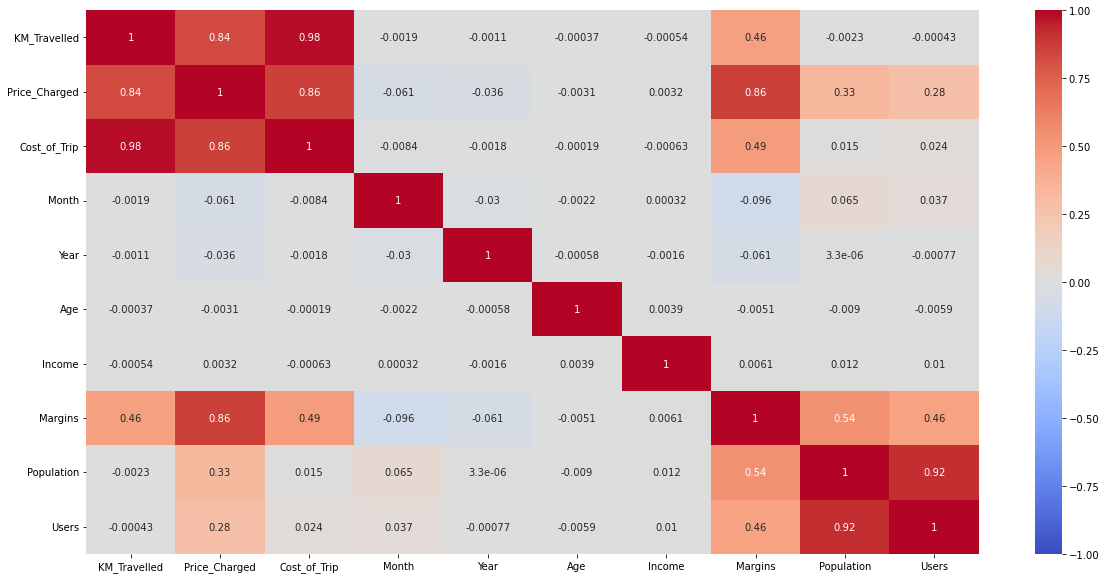

In [34]:
#Plotting the heat map to get good understanding of correlations
plt.figure(figsize=(20,10))
sns.heatmap(correlation.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.show()

It Can be concluded there is strong correlation between :<br>
- Price Charged and Cost of trip with KM's Travelled
- Margins with Price Charged
- Population with Users

### Exploring the data (EDA)

#### 1. Monthly trend of no. of transactions

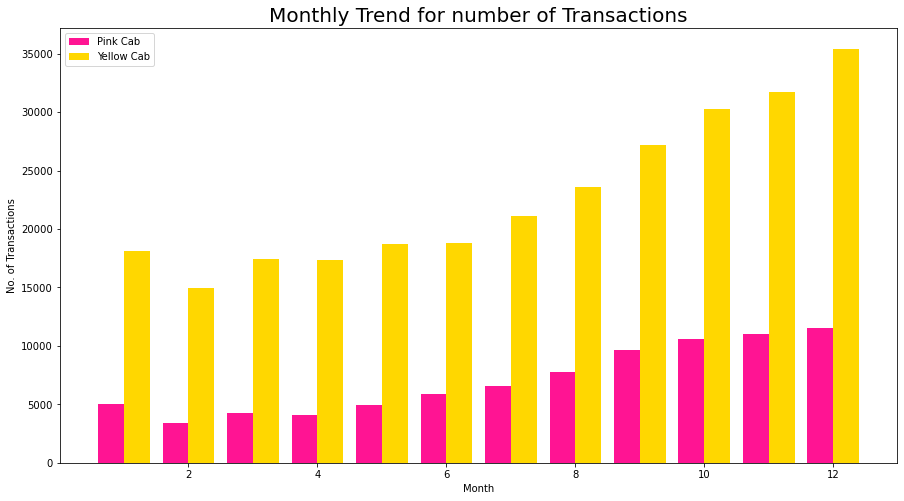

In [35]:
#Checking the monthly trend of no. of transactions for both the companies
plt_pink_month = df[df.Company=='Pink Cab'].groupby('Month').Transaction_ID.count()
plt_yellow_month = df[df.Company=='Yellow Cab'].groupby('Month').Transaction_ID.count()
plt.figure(figsize=(15,8))
ax = plt.subplot(111)
ax.bar(plt_pink_month.index-0.2, plt_pink_month.values, width=0.4, color='deeppink', align='center',label='Pink Cab')
ax.bar(plt_yellow_month.index+0.2, plt_yellow_month.values, width=0.4, color='gold', align='center',label='Yellow Cab')
plt.title('Monthly Trend for number of Transactions', fontdict={'fontsize':20})
plt.ylabel('No. of Transactions')
plt.xlabel('Month')
plt.legend()
plt.show()

- Trend of number of transaction month wise is almost same for both the companies
- No. of transactions for yellow cabs is nearly three times higher than pink cabs

#### 2. Yearly trend of no. of transactions

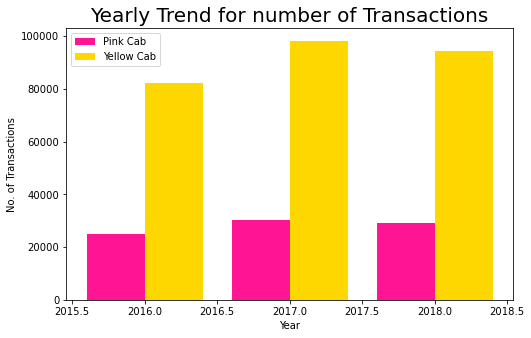

In [36]:
#Checking the yearly trend of no. of transactions for both the companies
plt_pink_month = df[df.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plt_yellow_month = df[df.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plt.figure(figsize=(8,5))
ax = plt.subplot(111)
ax.bar(plt_pink_month.index-0.2, plt_pink_month.values, width=0.4, color='deeppink', align='center',label='Pink Cab')
ax.bar(plt_yellow_month.index+0.2, plt_yellow_month.values, width=0.4, color='gold', align='center',label='Yellow Cab')
plt.title('Yearly Trend for number of Transactions', fontdict={'fontsize':20})
plt.ylabel('No. of Transactions')
plt.xlabel('Year')
plt.legend()
plt.show()

- Yearly transactions also show same trend for both with highest transactions in year 2017
- Yearly transactions for yellow cabs are three times higher than pink cab

#### 3. Distribution of KM's Travelled

In [37]:
df.KM_Travelled.describe()

count    359392.000000
mean         22.567254
std          12.233526
min           1.900000
25%          12.000000
50%          22.440000
75%          32.960000
max          48.000000
Name: KM_Travelled, dtype: float64

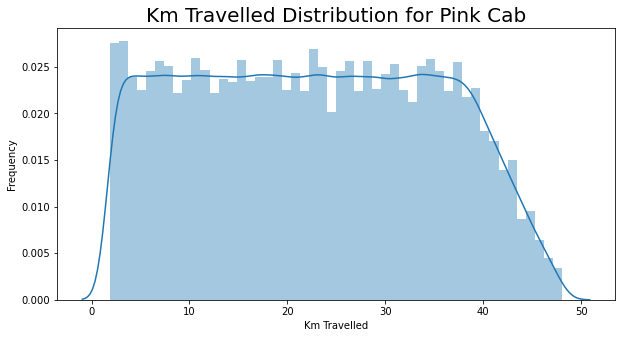

In [38]:
#Lets check the distribution of KM travlled 
plt.figure(figsize = (10, 5))
sns.distplot(cab_data['KM_Travelled'], bins = 50)
plt.title('Km Travelled Distribution for Pink Cab', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')
plt.show()

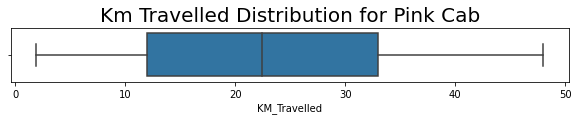

In [39]:
plt.figure(figsize = (10, 1))
sns.boxplot(cab_data['KM_Travelled'])
plt.title('Km Travelled Distribution for Pink Cab', fontsize=20)
plt.show()

- KM's Travelled for all transactions are between 1.9 KM to 20 KM
- Median of KM's Travelled is 22.44 KMs

#### 4. Distribution of Price Charged

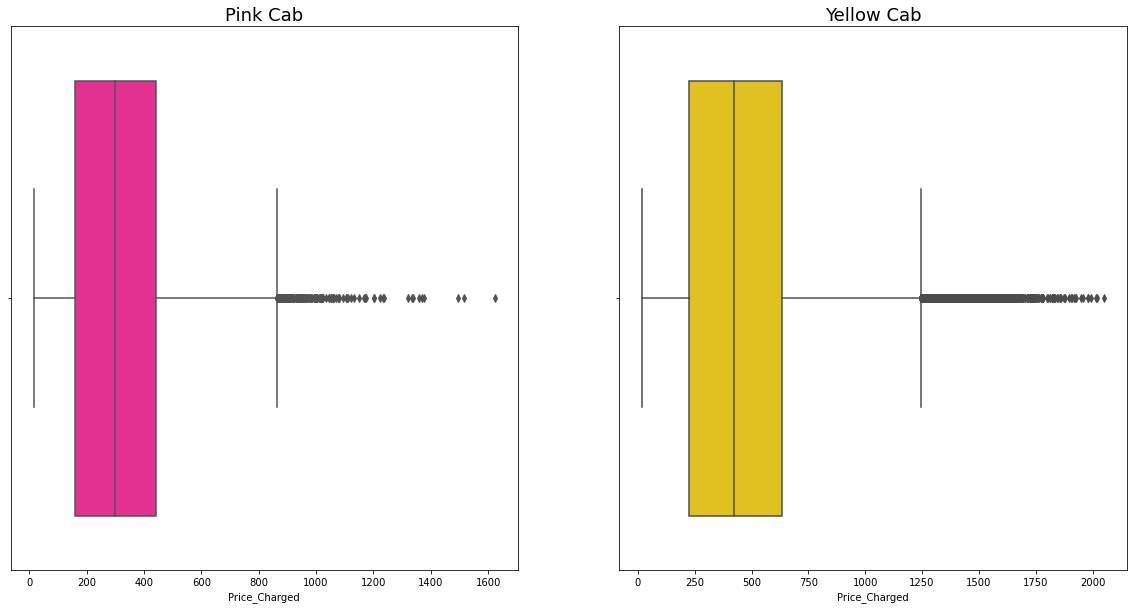

In [40]:
#Distribution of Price Charged
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
sns.boxplot(pink_cab['Price_Charged'], ax=ax1, color = 'deeppink')
ax1.set_title('Pink Cab', fontsize=18)
sns.boxplot(yellow_cab['Price_Charged'], ax=ax2, color='gold')
ax2.set_title('Yellow Cab', fontsize=18)
plt.show()

- The prices charged for Yellow Cabs are comparatively more as compared to that of Pink Cab
- We are predicting that the outliers in the Price_charged are because of Holiday season or the High end services(Cars)

#### 5. Price Charged with Respect to Distance

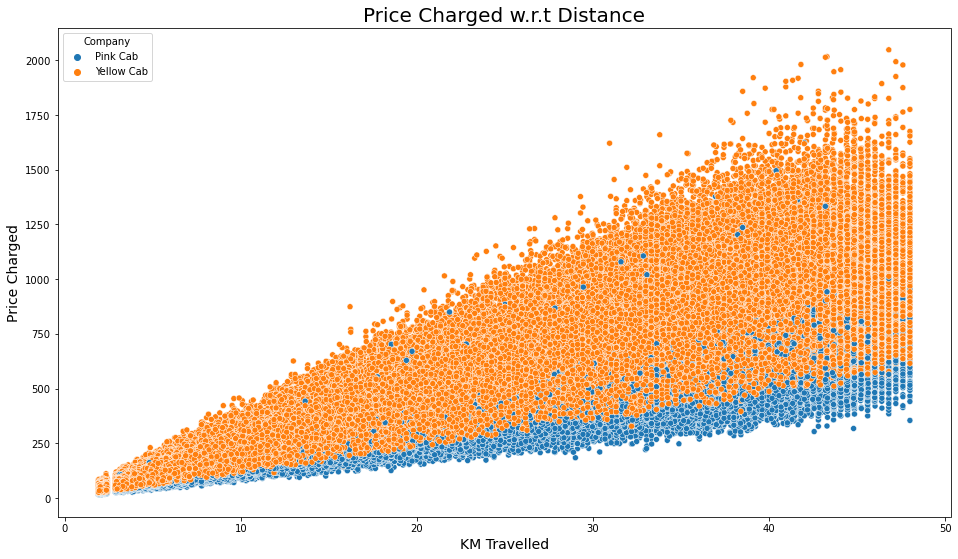

In [41]:
#Price Charged v/s Distance travelled
plt.figure(figsize = (16, 9))
sns.scatterplot(data=cab_data, x="KM_Travelled", y='Price_Charged', hue='Company')
plt.title('Price Charged w.r.t Distance',fontsize = 20)
plt.ylabel('Price Charged',fontsize = 14)
plt.xlabel('KM Travelled',fontsize = 14)
plt.show()

- There is linear relationship between price charged and KM's Travelled
- Yellow cabs charges more price as compared to Pink cabs for KM travelled

#### 6. User distribution w.r.t. Companies

In [42]:
user=df.groupby('Company')
avg_user = user.Users.mean()
index = avg_user.index
value = avg_user.values 

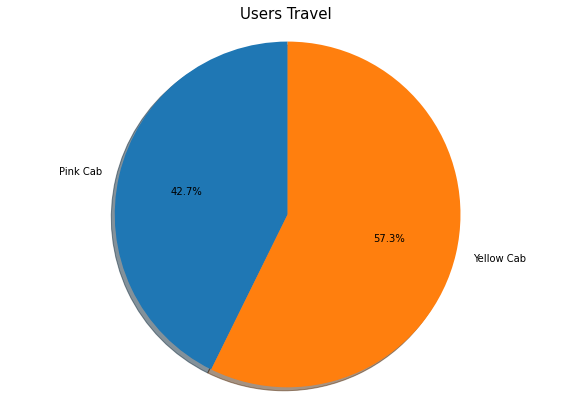

In [43]:
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(value , labels=index, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Users Travel', fontsize = 15)
plt.show()

- Yellow Cabs have more number of users as compared to pink cabs

#### 7. Gender Distributions of whole dataset

In [44]:
#Checking the count of each gender for both company
gender_cab=df.groupby(['Company','Gender']).Customer_ID.nunique()
gender_cab

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer_ID, dtype: int64

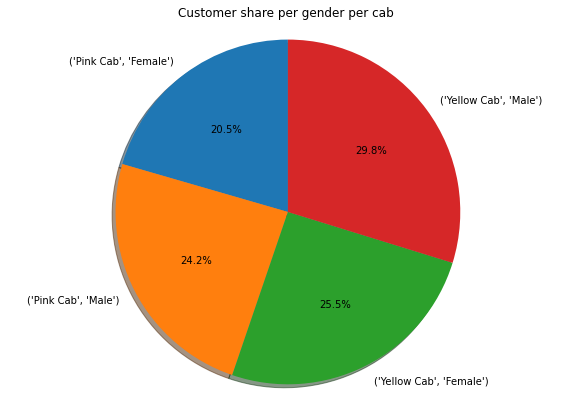

In [45]:
ind = gender_cab.index
vals = gender_cab.values
fig, ax = plt.subplots(figsize=(10,7))
ax.pie(vals , labels=ind, autopct='%1.1f%%',shadow=True, startangle=90,)
ax.axis('equal')

plt.title('Customer share per gender per cab')
plt.show()

- For both companies male users are more as compared to female users

#### 8. Distribution of Users among different cities

In [46]:
#Bifurcation of users in city 
cities = df.groupby('City').Transaction_ID.count()
cities

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Transaction_ID, dtype: int64

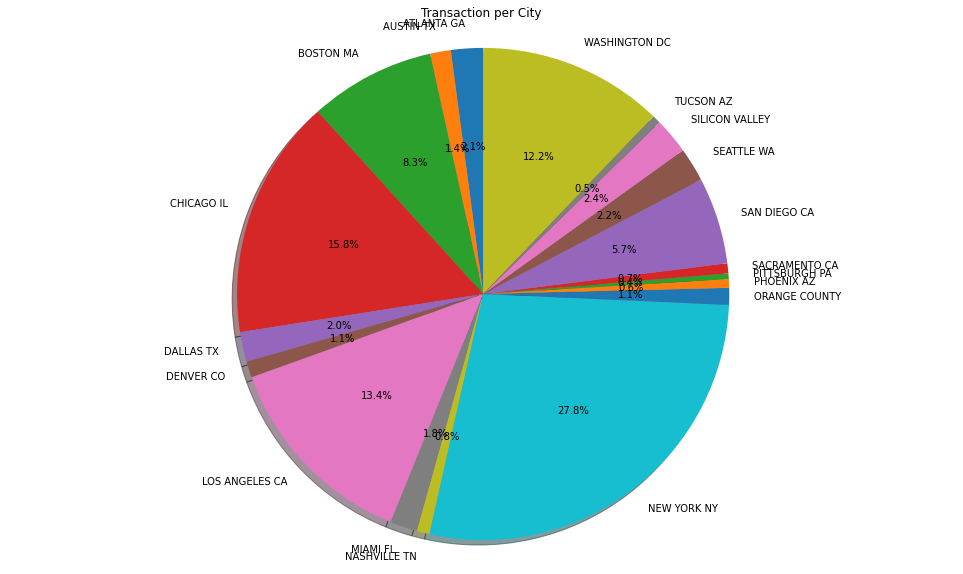

In [47]:
ind = cities.index
vals = cities.values
figy, axy = plt.subplots(figsize=(17,10))
axy.pie(vals , labels=ind, autopct='%1.1f%%',shadow=True, startangle=90,)
axy.axis('equal')

plt.title('Transaction per City')
plt.show()

- New York has most number of users.
- Los Angeles, Chicago and Washington also has high number of users


#### 9. Propotion of population to number of users for each city

In [48]:
urp = (city['Users'] /city['Population']) * 100 
cities = city['City']

In [49]:
from random import randint

colors = []
n = 16

for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

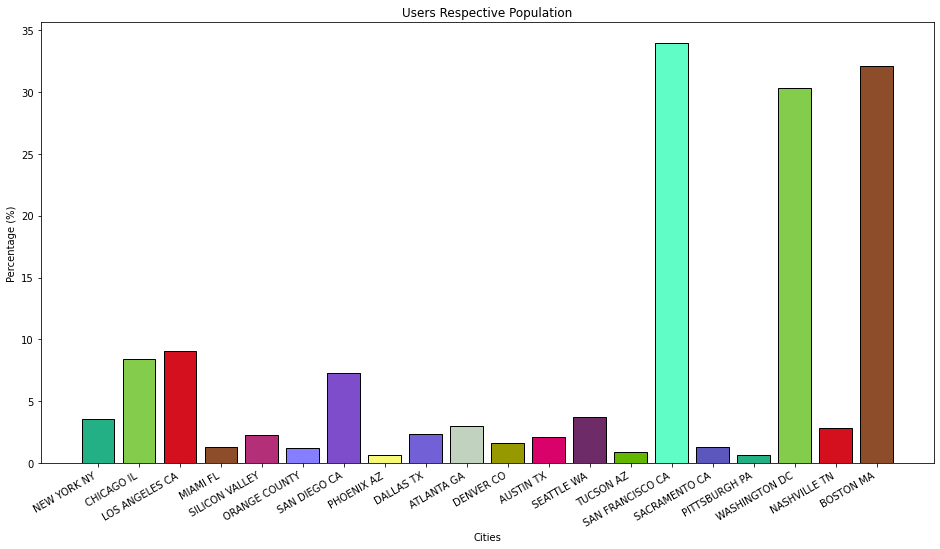

In [50]:
plt.figure(figsize = (16, 9))
plt.bar(cities, urp, edgecolor='black', color = colors)
plt.gcf().autofmt_xdate()
plt.title('Users Respective Population')
plt.ylabel('Percentage (%)')
plt.xlabel('Cities')
plt.show()

- San Fransico, Washington DC and Boston MA have most user/population propotion

#### 10. Price charged w.r.t. Distance travlled

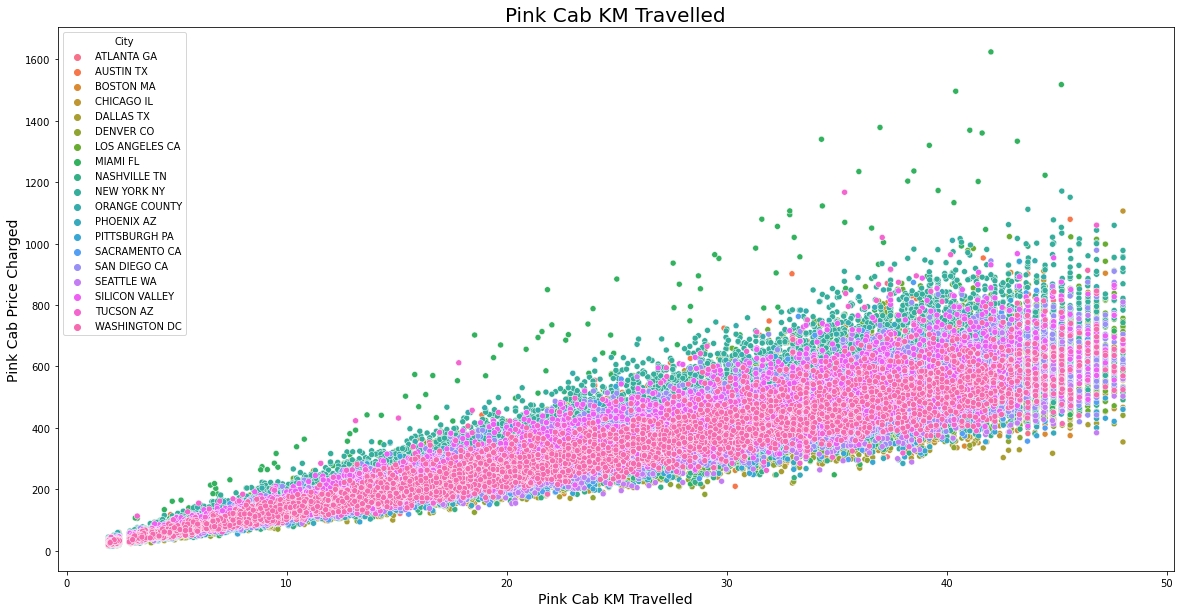

In [51]:
#Plotting scatter plot of KMs travelled and Price Charged for pink cab company with City as hue
plt.figure(figsize=(20,10))
sns.scatterplot(data=pink_cab, x=pink_cab["KM_Travelled"], y=pink_cab['Price_Charged'], hue="City")
plt.title('Pink Cab KM Travelled',fontsize = 20)
plt.ylabel('Pink Cab Price Charged',fontsize = 14)
plt.xlabel('Pink Cab KM Travelled',fontsize = 14)
plt.show()

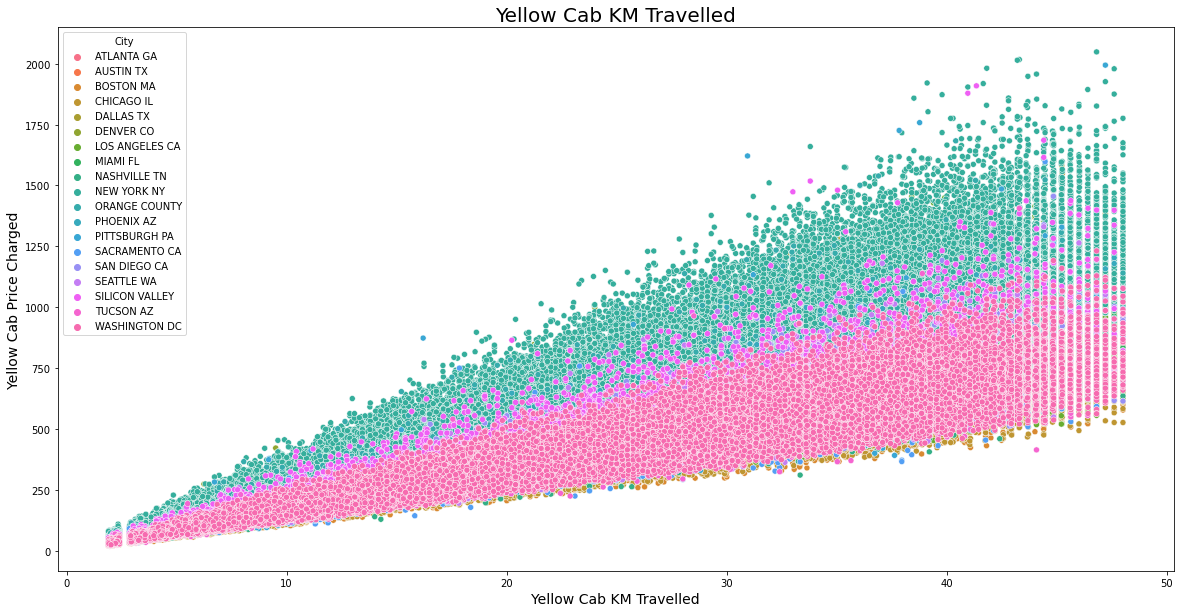

In [52]:
#Plotting scatter plot of KMs travelled and Price Charged for yellow cab company with City as hue
plt.figure(figsize=(20,10))
sns.scatterplot(data=yellow_cab, x=yellow_cab["KM_Travelled"], y=yellow_cab['Price_Charged'], hue="City")
plt.title('Yellow Cab KM Travelled',fontsize = 20)
plt.ylabel('Yellow Cab Price Charged',fontsize = 14)
plt.xlabel('Yellow Cab KM Travelled',fontsize = 14)
plt.show()


- Pink cabs charges almost same across different cities
- Yellow cabs charges more in New York as compared to different cities for same distance travelled

#### 11. Profit/Margins

In [53]:
company = df.groupby('Company')
price_charged = company['Price_Charged'].mean()
cost_trip = company['Cost_of_Trip'].mean()
c = cost_trip.index
c_v = cost_trip.values
c_p = price_charged.values

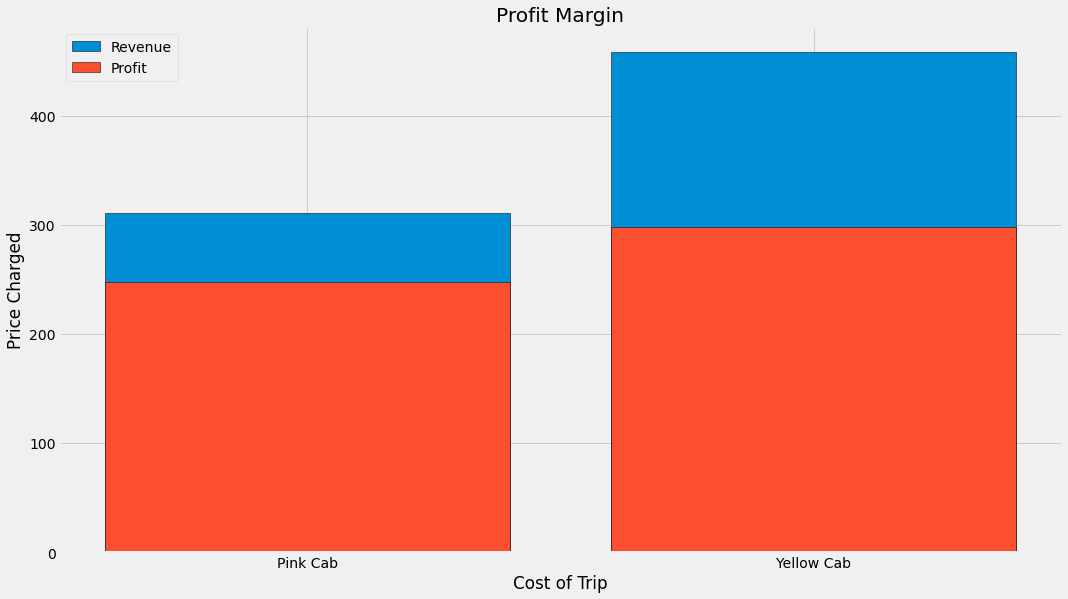

In [54]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (16, 9))
plt.bar(c, c_p, edgecolor='black', label="Revenue")
plt.bar(c, c_v, edgecolor='black', label="Profit")
plt.title('Profit Margin')
plt.ylabel('Price Charged')
plt.xlabel('Cost of Trip')
plt.legend()
plt.show()

- Yellow cabs takes more profit as compared to pink cabs

#### 12. Monthly and Yearly trend of profits for both the companies

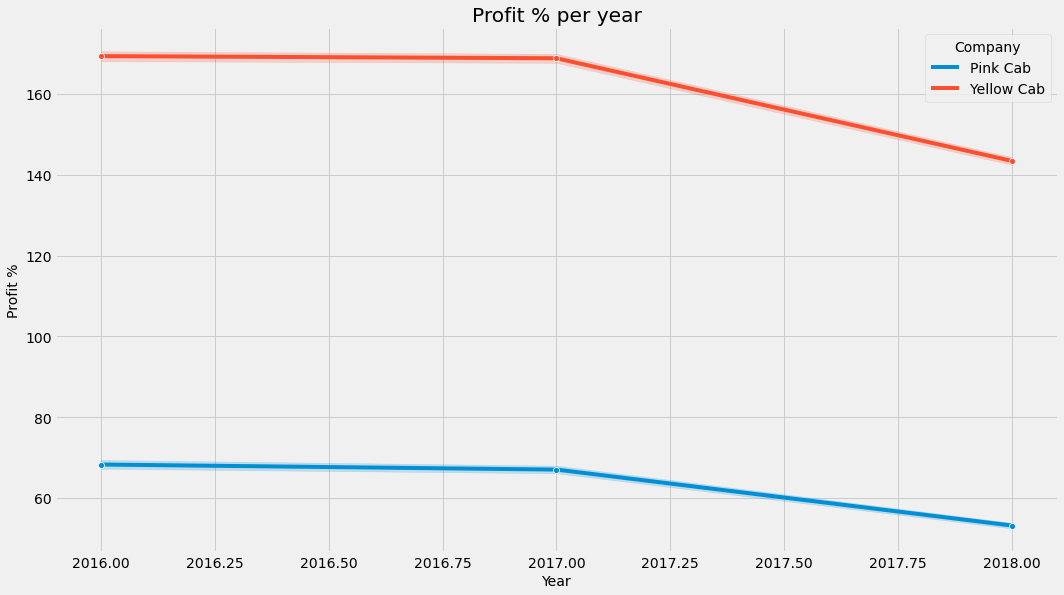

In [55]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Year', y='Margins', hue="Company", data=df, marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per year")
plt.show()

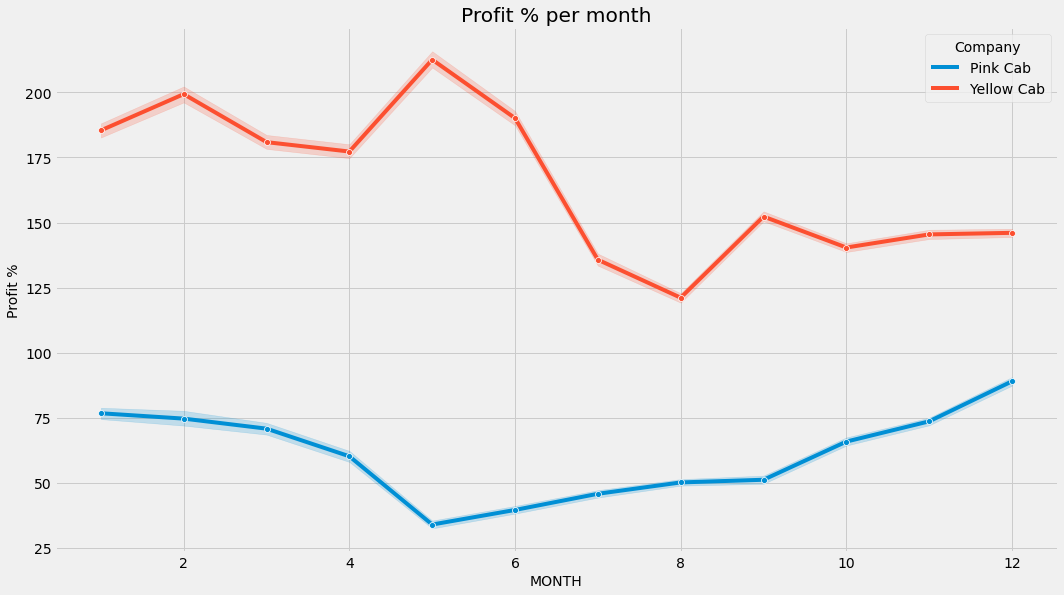

In [56]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Month', y='Margins', hue="Company", data=df, marker='o')
plt.xlabel("MONTH", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per month")
plt.show()

- Profit for both the companies reduced from 2017 t 2018
- Profit of Pink cabs have increased after may month but reduced for yellow cabs
- Overall profit % for yellow cab is higher then pink cab

#### 12. Profit w.r.t. no. of Transactions 

In [57]:
#Margins based on the number of transactions for New York NY
dt1 = df[(df.Company=='Pink Cab')&(df.City=='NEW YORK NY')].groupby(['Year','Month']).Margins.mean()
dt2 = df[(df.Company=='Yellow Cab')&(df.City=='NEW YORK NY')].groupby(['Year','Month']).Margins.mean()
dd1 = pd.DataFrame({'Margins_pink':dt1.values,'Transactions_pink':df[df.Company=='Pink Cab'].groupby(['Year','Month']).Transaction_ID.count().values})
dd2 = pd.DataFrame({'Margins_yellow':dt2.values,'Transactions_yellow':df[df.Company=='Yellow Cab'].groupby(['Year','Month']).Transaction_ID.count().values})
print(dt1)
print(dt2)
print(dd1)
print(dd2)

Year  Month
2016  1         92.129950
      2        128.794693
      3        114.400288
      4         85.057904
      5         48.949528
      6         27.788159
      7         44.201281
      8         91.624815
      9         68.818719
      10       147.491823
      11       135.107955
      12       173.581389
2017  1        156.038906
      2        100.310480
      3         65.847218
      4         65.405556
      5         62.795648
      6         61.110410
      7         96.887832
      8         54.513166
      9         90.443586
      10       133.755330
      11       129.812623
      12       202.798411
2018  1         94.239281
      2         92.877017
      3         83.393463
      4         82.761664
      5         38.335734
      6         29.274855
      7         55.449930
      8         60.953666
      9         64.411242
      10       113.972785
      11       123.915903
      12       144.376084
Name: Margins, dtype: float64
Year  Month
2016  1   

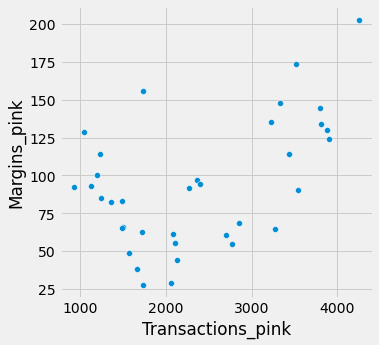

In [58]:
#Checking the Margins based on number of transaction for pink cab
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd1.Transactions_pink,y=dd1.Margins_pink)
plt.show()

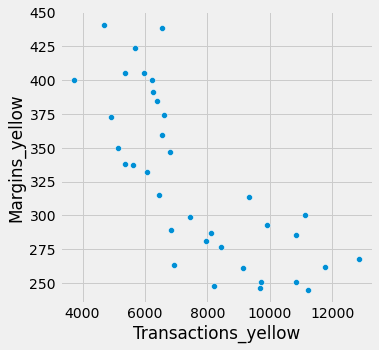

In [59]:
#Checking the Margins based on number of transaction for yellow cab
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd2.Transactions_yellow,y=dd2.Margins_yellow)
plt.show()

- Pink cab increases the profit with increase in number of transactions but yellow cab reduces the profit with increase in transactions

### HYPOTHESIS TESTING

<b>HYPOTHESIS 1: Is there any difference in Profit regarding Age</b><br>
H0 : There is no difference regarding Age in both cab companies.<br>
H1 : There is difference regarding Age in both cab companies.

In [60]:
#Pink Cab
below_age = df[(df.Age<=50)&(df.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
above_age = df[(df.Age>50)&(df.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(below_age.shape[0],above_age.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(below_age.values,b=above_age.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

71228 13483
We accept null hypothesis that theres no difference
P value is  0.32817487547980695


In [61]:
#Yellow Cab
below_age = df[(df.Age<=50)&(df.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
above_age = df[(df.Age>50)&(df.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(below_age.shape[0],above_age.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(below_age.values,b=above_age.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

231480 43201
We accept alternate hypothesis that theres a difference
P value is  6.494256817799368e-09


In [62]:
#Margins per Age having age less than or equal 50
df[df.Age<=50].groupby('Company').Margins.mean()

Company
Pink Cab       62.765586
Yellow Cab    161.081921
Name: Margins, dtype: float64

In [63]:
#Margins per Age having age less than or equal 50
df[df.Age>50].groupby('Company').Margins.mean()

Company
Pink Cab       62.053044
Yellow Cab    155.855885
Name: Margins, dtype: float64

- Pink cab does not have any difference in price charged based on age
- Yellow cab changes the price for users above 50 years of age

<b>HYPOTHESIS 2 : Is there any difference in Profit regarding Payment mode</b><br>
H0 : There is no difference regarding Payment_Mode in both cab companies.<br>
H1 : There is difference regarding Payment_Mode in both cab companies.<br>

In [64]:
#Pink Cab
cash = df[(df.Payment_Mode=='Cash')&(df.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
card = df[(df.Payment_Mode=='Card')&(df.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(cash.values,b=card.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)


We accept null hypothesis that theres no difference
P value is  0.7900465828793288


In [65]:
#Yellow Cab
cash = df[(df.Payment_Mode=='Cash')&(df.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
card = df[(df.Payment_Mode=='Card')&(df.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(cash.values,b=card.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

We accept null hypothesis that there is no statistical difference
P value is  0.2933060638298729


- There is no difference in prices based on payment methos for both the companies

<b>HYPOTHESIS 3: Is there any difference in profit regarding Gender</b><br>
H0 : There is no difference regarding Gender in both cab companies.<br>
H1 : There is difference regarding Gender in both cab companies.

In [66]:
#Yellow Cab
female_yellow = df[(df.Gender=='Female')&(df.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
male_yellow = df[(df.Gender=='Male')&(df.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(female_yellow.shape[0],yellow_cab.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(female_yellow.values,b=male_yellow.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

116000 274681
We accept alternate hypothesis that there is a statistical difference
P value is  6.060473042494144e-25


In [67]:
#Pink Cabs
female_pink = df[(df.Gender=='Female')&(df.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
male_pink = df[(df.Gender=='Male')&(df.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(female_pink.shape[0],male_pink.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(female_pink.values,b=male_pink.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference')
else:
    print('We accept null hypothesis that there is no difference')
    
print('P value is ', p_value)

37480 47231
We accept null hypothesis that there is no difference
P value is  0.11515305900425798


- There is no difference based on gender for pink cabs but yellow cabs makes different profits based on gender

### Recommendations

<b>Post Analysis it can be concluded that yellow cab company is much better as compared to pink cab company.</b>

- CLIENT ANALYSIS :</br>
1) AGE : In Yellow Cab company there is difference in prices for people older than 50 years, whereas in Pink Cab there is no difference for all age groups. </br>
2) GENDER: Yellow cabs company also provided discount to female customer </br>
3) PAYMENT MODE : There is no difference in profits based on payment mode for both companies</br></br></br>

- PROFIT ANALYSIS :</br>
1) CITY : Pink cabs charges more profit from new York city while pink city keeps it same across all cities.</br>
2) TRANSACTIONS : Yellow cabs have more number of transactions almost 3 times as compared to pink cabs and yellow cabs also reduced profit percentage with increase in transactions.</br>
3) PROFIT: Yellow cabs reduces the profit percent with number of transactions but still each month it has more profit percent as compared to Pink cabs.</br>

<b>On the basis of above points , I recommend Yellow cab for investment.</b>


In [68]:
df.shape

(359392, 16)